In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/CFA-CFA_MC')

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/CFA-CFA_MC/abalone.csv')
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
# prompt: Using dataframe data: name

data['Rings'].value_counts()

,count
Rings,
9,689
10,634
8,568
11,487
7,391
12,267
6,259
13,203
14,126


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Load the dataset
df = data.copy()

# Encode categorical feature 'Sex'
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# Separate features and target
X = df.drop(columns=['Rings']).values
y = df['Rings'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\n--- Random Forest Classifier ---")
print(classification_report(y_test, y_pred_rf))

# k-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors as needed
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\n--- k-Nearest Neighbors Classifier ---")
print(classification_report(y_test, y_pred_knn))

# Multilayer Perceptron Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)  # Adjust parameters as needed
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print("\n--- Multilayer Perceptron Classifier ---")
print(classification_report(y_test, y_pred_mlp))


--- Random Forest Classifier ---
              precision    recall  f1-score   support

           3       0.25      0.33      0.29         3
           4       0.29      0.38      0.33        13
           5       0.50      0.44      0.47        32
           6       0.35      0.31      0.33        48
           7       0.28      0.24      0.26        84
           8       0.28      0.37      0.32        99
           9       0.23      0.27      0.25       142
          10       0.25      0.26      0.25       139
          11       0.24      0.32      0.28        93
          12       0.17      0.14      0.15        51
          13       0.09      0.10      0.09        31
          14       0.22      0.08      0.11        26
          15       0.00      0.00      0.00        21
          16       0.17      0.08      0.11        13
          17       0.25      0.12      0.17         8
          18       0.00      0.00      0.00        12
          19       0.00      0.00      0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif


--- Multilayer Perceptron Classifier ---
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.38      0.77      0.51        13
           5       0.43      0.19      0.26        32
           6       0.37      0.40      0.38        48
           7       0.40      0.42      0.41        84
           8       0.38      0.43      0.41        99
           9       0.33      0.51      0.40       142
          10       0.23      0.27      0.25       139
          11       0.30      0.28      0.29        93
          12       0.00      0.00      0.00        51
          13       0.09      0.16      0.12        31
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        13
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00        12
          19       0.00      0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


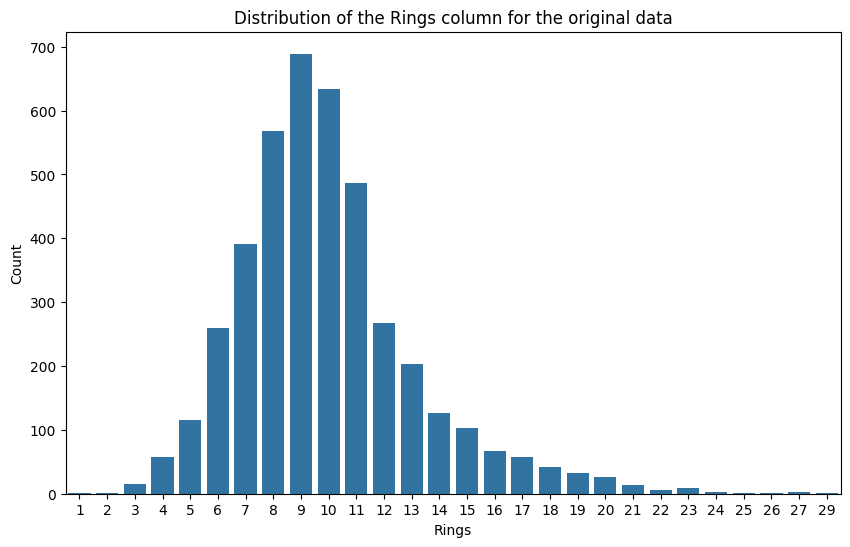

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ đồ thị phân phối của cột 'Rings' cho dữ liệu gốc
plt.figure(figsize=(10, 6))
sns.countplot(x='Rings', data=data)
plt.title('Distribution of the Rings column for the original data')
plt.xlabel('Rings')
plt.ylabel('Count')
plt.show()

In [ ]:
!pip install imblearn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from cfa import CFA

# Encode categorical feature 'Sex'
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

# Separate features and target
X = data.drop(columns=['Rings']).values
y = data['Rings'].values

# Identify minority classes in 'Rings'
unique_classes, counts = np.unique(y, return_counts=True)
minority_classes = unique_classes[counts < 100]

# Apply CFA to balance minority classes in 'Rings'
synthetic_instances = []
synthetic_labels = []
for minority_class in minority_classes:
    print(f"Balancing class: {minority_class}")

    # Create a binary target variable for the current minority class
    y_binary = np.where(y == minority_class, 1, 0)

    # Apply CFA
    cfa = CFA(fd=2, tol=0.1)
    X_resampled, y_resampled = cfa.run_cfa(X, y_binary)

    # Extract synthetic instances for the current minority class
    synthetic_indices = np.where(y_resampled[len(y):] == 1)[0]
    synthetic_instances.extend(X_resampled[len(y):][synthetic_indices])
    synthetic_labels.extend([minority_class] * len(synthetic_indices))

# Combine original data with synthetic instances
X_balanced = np.concatenate((X, synthetic_instances))
y_balanced = np.concatenate((y, synthetic_labels))

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

# ----------------------------------
# Train and evaluate classifiers
# ----------------------------------

# 1. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 2. k-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# 3. Multilayer Perceptron Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# ----------------------------------
# Print evaluation results
# ----------------------------------

def evaluate_classifier(y_test, y_pred, classifier_name):
    print(f"\n--- Evaluation for {classifier_name} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

evaluate_classifier(y_test, y_pred_rf, "Random Forest")
evaluate_classifier(y_test, y_pred_knn, "k-Nearest Neighbors")
evaluate_classifier(y_test, y_pred_mlp, "Multilayer Perceptron")

Balancing class: 1
Balancing class: 2
Balancing class: 3
Balancing class: 4
Balancing class: 16
Balancing class: 17
Balancing class: 18
Balancing class: 19
Balancing class: 20
Balancing class: 21
Balancing class: 22
Balancing class: 23
Balancing class: 24
Balancing class: 25
Balancing class: 26
Balancing class: 27
Balancing class: 29


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Evaluation for Random Forest ---
Confusion Matrix:
 [[640  34   4  12   0   0   0   0   0   0   0   1   0   0   0  12   9   6
    6  14  11  18  22  14   2   0  17   5]
 [ 53 100 275 218   4   0   8   3  12  13   9   2   3   5   1  17  20   9
   15  10  14   6  14   8   1   2   1   4]
 [  9 201  91 343   3   4   5   5  13  12   9   3   3   3   1  20   7  10
   32  11   4   4  18   8   4   8   1  13]
 [  5 200 251  45   2  12  22  23  43  33  24  16  13   9   6  14   9   4
   15   6   6   3  20   2   0   1   3   1]
 [  0  11   3   4   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0  15   8  18   2   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0   1   0   2   0   0   0   0   0]
 [  1  22  13  39   0   0   0   1   0   0   0   0   0   0   0   1   3   1
    0   0   0   0   2   0   0   0   0   0]
 [  1  31  27  47   0   0   0   0   0   0   0   0   0   0   0   1   3   1
    0   0   0   1   4   0   0   0   0   2]
 [  1  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Tạo DataFrame từ dữ liệu đã cân bằng
df_balanced = pd.DataFrame(X_balanced, columns=df.columns[:-1])  # Lấy tên cột từ df gốc
df_balanced['Rings'] = y_balanced

# Lưu DataFrame vào file CSV
df_balanced.to_csv('/content/drive/MyDrive/CFA-CFA_MC/abalone_balanced.csv', index=False)

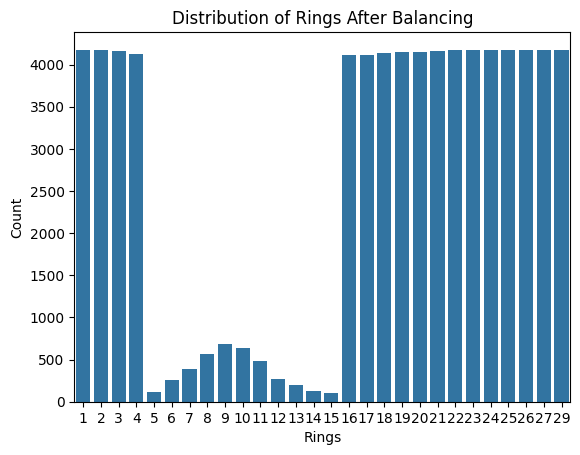

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_balanced' is your balanced target variable
sns.countplot(x=y_balanced)
plt.xlabel('Rings')
plt.ylabel('Count')
plt.title('Distribution of Rings After Balancing')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Encode categorical feature 'Sex'
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

# Separate features and target
X = data.drop(columns=['Rings']).values
y = data['Rings'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for each class
X_resampled = []
y_resampled = []
for class_label in np.unique(y_train):
    # Create a binary target variable for the current class
    y_binary = (y_train == class_label).astype(int)

    # Determine k_neighbors based on available samples for the class
    k = min(5, np.sum(y_binary) - 1)  # Ensure k_neighbors is less than the number of samples

    # Apply SMOTE to oversample the minority class
    # If there's only one sample for the class, SMOTE won't be applied
    if np.sum(y_binary) > 1:
        smote_temp = SMOTE(random_state=42, k_neighbors=k)  # Create a temporary SMOTE object with adjusted k
        X_oversampled, y_oversampled = smote_temp.fit_resample(X_train, y_binary)

        # Extract instances belonging to the current class from the oversampled data
        indices = np.where(y_oversampled == 1)[0]
        X_resampled.extend(X_oversampled[indices])
        y_resampled.extend([class_label] * len(indices))
    else:
        # Handle the case where there's only one sample for the class
        indices = np.where(y_binary == 1)[0]
        X_resampled.extend(X_train[indices])
        y_resampled.extend([class_label] * len(indices))

# Convert lists to numpy arrays
X_resampled = np.array(X_resampled)
y_resampled = np.array(y_resampled)

# ----------------------------------
# Train and evaluate classifiers
# ----------------------------------

# 1. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)

# 2. k-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_resampled, y_resampled)
y_pred_knn = knn.predict(X_test)

# 3. Multilayer Perceptron Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), random_state=42)
mlp.fit(X_resampled, y_resampled)
y_pred_mlp = mlp.predict(X_test)

# ----------------------------------
# Print evaluation results
# ----------------------------------

def evaluate_classifier(y_test, y_pred, classifier_name):
    print(f"\n--- Evaluation for {classifier_name} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

evaluate_classifier(y_test, y_pred_rf, "Random Forest")
evaluate_classifier(y_test, y_pred_knn, "k-Nearest Neighbors")
evaluate_classifier(y_test, y_pred_mlp, "Multilayer Perceptron")


--- Evaluation for Random Forest ---
Confusion Matrix:
 [[ 2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  2  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  4 17  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2 14 13 12  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  4 16 23 19 10  4  3  2  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  3 17 34 21  5  3  5  1  1  4  1  0  1  1  0  0  0  0]
 [ 0  0  0  4  9 32 27 21 16 13  5  6  4  1  1  2  1  0  0  0  0]
 [ 0  0  0  3  6 11 22 21 22 13 13  5  4  4  4  2  5  2  2  0  0]
 [ 0  1  0  0  1  6 13 13 16 11 11  5  4  2  2  4  2  1  0  1  0]
 [ 0  0  0  1  1  3  4  7  8  5  4  5  3  3  1  4  1  0  1  0  0]
 [ 0  0  0  1  1  1  1  2  4  4  3  7  2  2  1  1  0  1  0  0  0]
 [ 0  0  0  0  0  3  1  3  4  2  0  1  4  5  0  1  1  1  0  0  0]
 [ 0  0  0  0  0  0  2  0  1  1  4  2  3  6  0  0  1  1  0  0  0]
 [ 0  0  0  0  1  0  0  0  2  0  2  1  1  1  1  1  1  0  1  0  1]
 [ 0  0  0  0  0  0

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load data (replace 'abalone.csv' with your data file)
#data = pd.read_csv('abalone.csv')

# Encode categorical feature 'Sex'
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

# Separate features and target
X = data.drop(columns=['Rings']).values
y = data['Rings'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply ADASYN for each class
X_resampled = []
y_resampled = []
for class_label in np.unique(y_train):
    # Create a binary target variable for the current class
    y_binary = (y_train == class_label).astype(int)

    # Determine n_neighbors based on available samples for the class
    n_neighbors = min(5, np.sum(y_binary) - 1)  # Ensure n_neighbors is less than the number of samples

    # Apply ADASYN to oversample the minority class
    # If there's only one sample for the class, ADASYN won't be applied
    if np.sum(y_binary) > 1:
        adasyn_temp = ADASYN(random_state=42, n_neighbors=n_neighbors)  # Create a temporary ADASYN object
        X_oversampled, y_oversampled = adasyn_temp.fit_resample(X_train, y_binary)

        # Extract instances belonging to the current class from the oversampled data
        indices = np.where(y_oversampled == 1)[0]
        X_resampled.extend(X_oversampled[indices])
        y_resampled.extend([class_label] * len(indices))
    else:
        # Handle the case where there's only one sample for the class
        indices = np.where(y_binary == 1)[0]
        X_resampled.extend(X_train[indices])
        y_resampled.extend([class_label] * len(indices))

# Convert lists to numpy arrays
X_resampled = np.array(X_resampled)
y_resampled = np.array(y_resampled)

# ----------------------------------
# Train and evaluate classifiers
# ----------------------------------

# 1. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)

# 2. k-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_resampled, y_resampled)
y_pred_knn = knn.predict(X_test)

# 3. Multilayer Perceptron Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), random_state=42)
mlp.fit(X_resampled, y_resampled)
y_pred_mlp = mlp.predict(X_test)

# ----------------------------------
# Print evaluation results
# ----------------------------------

def evaluate_classifier(y_test, y_pred, classifier_name):
    print(f"\n--- Evaluation for {classifier_name} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

evaluate_classifier(y_test, y_pred_rf, "Random Forest")
evaluate_classifier(y_test, y_pred_knn, "k-Nearest Neighbors")
evaluate_classifier(y_test, y_pred_mlp, "Multilayer Perceptron")


--- Evaluation for Random Forest ---
Confusion Matrix:
 [[ 2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  4  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  6 13  7  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2 12 14 11  5  3  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  2  5 15 28 20  8  2  2  1  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  4 18 33 18  8  6  6  1  1  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  4  6 28 28 23 22 12  5  5  5  0  2  2  0  0  0  0  0]
 [ 0  0  0  1  6 15 26 20 16 15  9  8  4  4  3  3  5  3  1  0  0]
 [ 0  0  1  0  2  6 13 12 17  8 12  8  4  1  4  3  1  0  0  1  0]
 [ 0  0  0  1  0  5  3  4  9  9  3  4  4  3  0  3  1  1  1  0  0]
 [ 0  0  0  1  2  1  1  3  1  5  3  4  3  2  1  1  0  2  1  0  0]
 [ 0  0  0  0  0  2  0  6  2  2  0  1  3  6  0  1  1  2  0  0  0]
 [ 0  0  0  0  0  0  2  0  1  1  4  2  3  6  0  0  1  1  0  0  0]
 [ 0  0  0  0  1  0  0  1  1  0  2  0  2  2  1  1  1  0  1  0  0]
 [ 0  0  0  0  0  0

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and 